<a href="https://colab.research.google.com/github/MattEntornos/matematicas/blob/main/grafos/practica_grafos_matthew.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Práctica 2. Grafos

## Práctica 2.1
**Algoritmo de Dijkstra**

1. Mira estos vídeos:
 * [Algoritmo de DIJKSTRA ruta corta](https://youtu.be/6rl0ghgPfK0)
 * [Ruta mas corta en una red, algoritmo de Dijkstra](https://youtu.be/rh02c7v3EKY)
2. ¿Qué utilidad tiene el algoritmo?
3. Explique el algoritmo.
4. De un ejemplo de un grafo resuelto con el algoritmo de Dijkstra.
* Muestre la imagen del grafo con sus:
  - nodos
  - aristas (con flecha si son orientadas)
  - pesos (distancias o costes)
* Muestre nuevamente la imagen del grafo pero en esta ocasión con la solución.

### Solución 2.1
* Pregunta 2
 - La utilidad que tiene el algoritmo despues de la visualización de los dos vídeos es determinar el camino más corto para aplicar desde un punto de origen o podríamos decir también desde un vértice o nodo hata el resto de puntos o vértices situados en un grafo con pesos o distancias en cada arista.

* Pregunta 3

 - Tras la visualización de los dos vídeos lo podemos aplicar tanto para grafos no dirigidos como para grafos dirigidos:
 
      - Grafos (no dirigidos)
          
          . El algoritmo consiste en coger un punto de partida, vértice o nodo y averiguar la distancia más corta hasta el nodo o vértice i.

          . Cada nodo va a tener una etiqueta, la cual estará formada por 3 valores [ x , i ]k.
          
           - .Donde (x) será la distancia hasta el nodo j desde el nodo origen.

           - .Donde (i) será el nodo de procedencia.

           - .Donde (k) será el número de iteración que se hizo.
           
           - El nodo origen siempre va a tener la misma etiqueta [0 , - ]0 

        .Una vez cogida nuestra etiqueta permanente, la anulamos y comenzamos a calcular las etiquetas de sus nodos vecinos.

        .Para saber que nodo temporal coger, será el que menor distancia acumulada tenga y la comenzamos a utilizar como nodo origen o nodo referencia para seguir calculando distancias.

        .Es posible que en algun momento llegue a tener dos etiquetas para un mismo nodo, eliminaré con el que menor distancia tenga. Un ejemplo para el nodo 3 tengo las siguiente etiquetas --> [5,4]2 y [4,2]3. Me quedaré con la segunda etiqueta [4,2]3 ya que es la distancia más corta. En el caso de que las distancias lleguen a ser idénticas, me quedaré con las dos ya que ese nodo tendrá dos rutas óptimas.
        
       - Grafos (dirigidos)  

         .Exactamente igual que en los grafos (no dirigidos) salvo que no se escribe el número de iteración que se hizo (k).








* Pregunta 4.1

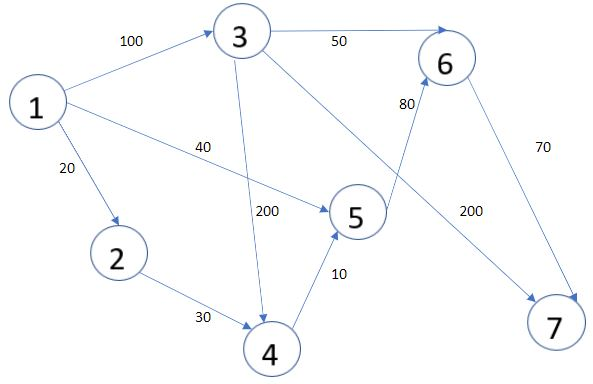


* Pregunta 4.2




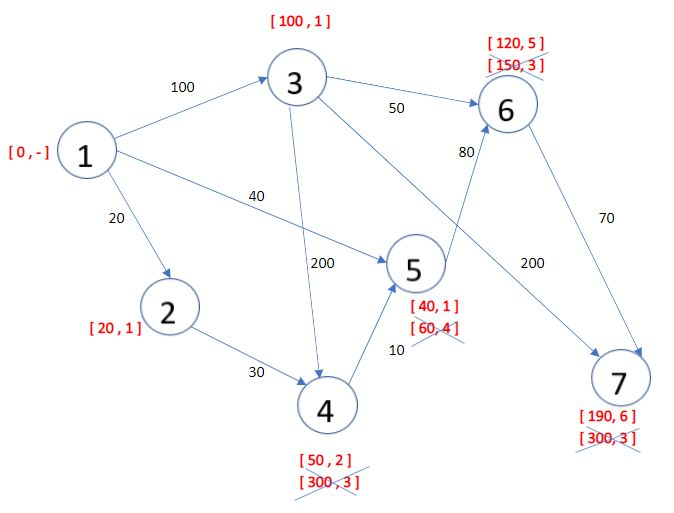

## Práctica 2.2
Vea el video:

* [Camino mas corto Solver](https://youtu.be/LYeMWlTfOgA)

Se pide:  
1. Replique en un archivo de Excel el caso del vídeo, en la Hoja 1. En el método de resolución de Solver elija el método Simplex.
2. En la Hoja 2, aplique esa metodología usando Solver a otro grafo de su invención. Dibuje el grafo, con sus nodos, flechas y pesos, y resuélvalo.
3. Suba el archivo de Excel creado a la tarea del Aula Virtual.

## Práctica 2.3
1. Muestre el enlace a alguna página donde se de el algoritmo de Dijkstra programado en **Python**.
2. Pruebe su código con algún grafo de ejemplo.

### Solución 2.3
* Pregunta 1
  
  - Tras la visualización de varias páginas, el que he considerado más claro de entender y más óptimo es el siguiente:

      . https://www.techiedelight.com/es/single-source-shortest-paths-dijkstras-algorithm/

      En el cual, el algoritmo se da además en dos lenguajes más: Java  y C##.

* Pregunta 2

  - Utilicemos el grafo que pusimos de ejemplo en el ejericio 1 (volvemos a adjuntar la imagen).

  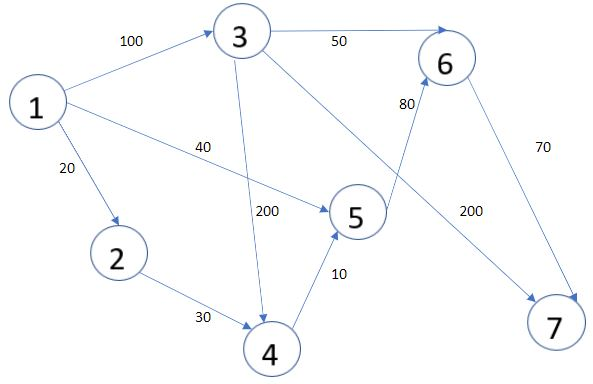


In [ ]:
import sys
from heapq import heappop, heappush
 
 
# Una clase para almacenar un nodo de heap
class Node:
    def __init__(self, vertex, weight=0):
        self.vertex = vertex
        self.weight = weight
 
    # Anule la función __lt__() para hacer que la clase `Node` funcione con un min-heap
    def __lt__(self, other):
        return self.weight < other.weight
 
 
# Una clase para representar un objeto graph
class Graph:
    def __init__(self, edges, n):
        # asigna memoria para la lista de adyacencia
        self.adjList = [[] for _ in range(n)]
 
        # agrega bordes al graph dirigido
        for (source, dest, weight) in edges:
            self.adjList[source].append((dest, weight))
 
 
def get_route(prev, i, route):
    if i >= 0:
        get_route(prev, prev[i], route)
        route.append(i)
 
 
# Ejecutar el algoritmo de Dijkstra en un graph dado
def findShortestPaths(graph, source, n):
 
    # crea un min-heap y empuja el nodo de origen con una distancia de 0
    pq = []
    heappush(pq, Node(source))
 
    # establece la distancia inicial desde la fuente a `v` como infinito
    dist = [sys.maxsize] * n
 
    # distancia de la fuente a sí mismo es cero
    dist[source] = 0
 
    # Lista # para rastrear vértices para los cuales ya se encontró el costo mínimo
    done = [False] * n
    done[source] = True
 
    # almacena el predecesor de un vértice (en una ruta de impresión)
    prev = [-1] * n
 
    # se ejecuta hasta que el min-heap esté vacío
    while pq:
 
        node = heappop(pq)      # Quitar y devolver el mejor vértice
        u = node.vertex         # obtener el número de vértice
 
        # hacer para cada vecino `v` de `u`
        for (v, weight) in graph.adjList[u]:
            if not done[v] and (dist[u] + weight) < dist[v]:        # Escalón de relajación
                dist[v] = dist[u] + weight
                prev[v] = u
                heappush(pq, Node(v, dist[v]))
 
        # marca el vértice `u` como hecho para que no se vuelva a recoger
        done[u] = True
 
    route = []
    for i in range(n):
        if i != source and dist[i] != sys.maxsize:
            get_route(prev, i, route)
            print(f'Path ({source} —> {i}): Minimum cost = {dist[i]}, Route = {route}')
            route.clear()
 
 
if __name__ == '__main__':
 
    # inicializa los bordes según el diagrama anterior
    # (u, v, w) representa la arista del vértice `u` al vértice `v` con peso `w`
    edges = [(1, 3, 100), (1, 2, 20), (3, 6, 50), (2, 4, 30), (3, 4, 200), (4, 5, 10),
            (1, 5, 40), (5, 6, 80), (3, 7, 200), (6, 7, 70)]
 
    # número total de nodos en el graph (etiquetados de 1 a 7)
    n = 8
 
    # graph de construcción
    graph = Graph(edges, n)
 
    # ejecuta el algoritmo de Dijkstra desde cada nodo
    for source in range(n):
        findShortestPaths(graph, source, n)

## Práctica 2.4
* Dibuja un grafo que tenga un mínimo de 6 nodos
* Crea en **Python** su **matriz de adyacencia**
* Crea en Python su **lista de adyacencia**
* ¿Son cero todos los elementos de la diagonal principal?
 - En qué caso serían todos cero y en qué caso no.
* ¿Es una matriz simétrica?
 - En qué caso sería simétrica y en qué caso no.
* Usando Python, suma todos los valores de la matriz
* Comprueba si funcionan bien o no los siguientes códigos:
 - El primero permite convertir una matriz de adyacencia en una lista de adyacencia.
 - El segundo permite convertir una lista de adyacencia en una matriz de adyacencia.
* Dibuja el grafo del ejemplo que se usa en este código.

In [ ]:
def convert_to_adjacency(matrix):
    start = 0
    res = []
    lst = []
    n = len(matrix)
    for i in range(n):
        res.append(lst*n)
    while start < n:
        y = matrix[start]
        for i in range(len(y)):
            if y[i]==1:
                res[start].append(i)
        start +=1
    return res

matrix =[[0,1,1,1,0,1,1,0,0],[1,0,0,1,0,0,1,1,0],[1,0,0,1,0,0,0,0,0],[1,1,1,0,1,0,0,0,0],[0,0,0,1,0,1,0,0,1],[1,0,0,0,1,0,0,0,1],[1,1,0,0,0,0,0,0,0],[0,1,0,0,0,0,0,0,0],[0,0,0,0,1,1,0,0,0]]
print(convert_to_adjacency(matrix))

In [ ]:
def convert_to_matrix(graph):
    matrix =[]
    for i in range(len(graph)): 
        matrix.append([0]*len(graph))
        for j in graph[i]:
            matrix[i][j]=1
    return matrix

lst =[[1,2,3,5,6],[0,3,6,7],[0,3],[0,1,2,4],[3,5,8],[0,4,8],[0,1],[1],[4,5]]
print(convert_to_matrix(lst))

## Práctica 2.5
**Árboles binarios**
* Mira este vídeo: [¿Qué son los ÁRBOLES BINARIOS y por qué son tan geniales?](https://youtu.be/lMTaNbJAqvM)
* ¿Qué son los **árboles binarios de búsqueda**? (en inglés: BST (Binary Search Tree))
* Mira este vídeo: [Recorrido de Árboles Binarios](https://youtu.be/WCiwBrj8EQY)
* Qué significa recorrer el árbol en:
 - preorden
 - inorden
 - postorden
* Al BST del vídeo anterior añadele dos nodos de tu elección, de forma que continúe siendo un BST, dibujalo (poniendo en color azul claro los dos nodos nuevos) y da su recorrido en:
 - preorden
 - inorden (observa que en este caso los nodos deben quedar **ordenados** de menor a mayor)
 - postorden
* ¿Por qué los BST son importantes en ciencias de la computación?
* Pon un link a una página o vídeo que trate este tema en **Python**.
* ¿Has probado el código en Python que comentas? ¿Funciona con el BST que has puesto como ejemplo?

## Práctica 2.6
* 1. ¿Qué es un **camino hamiltoniano**?
* 2. Pon un ejemplo
* 3. Dibújalo
* 4. Resulevelo
* 5. ¿Qué utilidad tiene?
* 6. Muestra los enlaces a un par de vídeos que hablen de ello

### Solución 2.6

* Pregunta 1

  - Para no utilizar la misma definición de los apuntes, lo haré de la forma de la cual he logrado comprender el concepto mejor:

    Lo que pretende un camino hamiltoniano es visitar todos los puntos, nodos o vértices de un grafo sin repetir las aristas.

* Pregunta 2

  - Un ejemplo fácil de comprender sería con un pentágono. 

* Pregunta 3


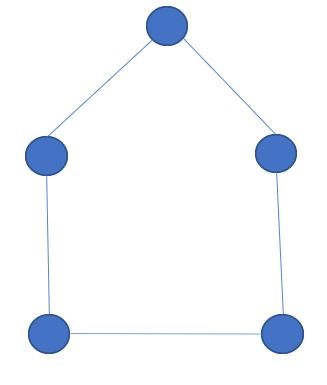



* Pregunta 4


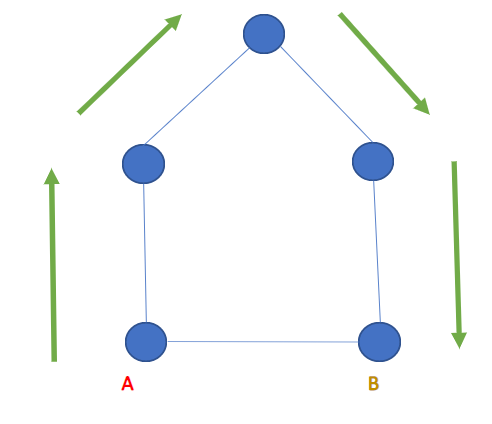

* Pregunta 5

  - La utilidad que consideraría que tiene la aplico por ejemplo a la vida real, si quiero hacer una ruta por 5 ciudades, por ejemplo, Barcelona, Madrid, Galicia, Murcia y Sevilla trataría de realizarla buscando la forma de hacerlo pasando una sola vez por cada una de ellas, es decir, trataría de encontrar un camino hamiltoniano. 


## Práctica 2.7
* Mira este vídeo:
 - [Un problema matemático de ciudades y carreteras](https://youtu.be/kwU1uIbylsM)
* Dibuja el grafo y da tu solución

## Práctica 2.8
* El problema de **los puentes de Königsberg**
* Describe el problema
* Muestra una imagen del grafo resultante
* Quién fue *Euler* y qué hizo para resolver el problema

## Práctica 2.9
* ¿Qué son los **caminos eulerianos**?
* ¿Qué son los **ciclos eulerianos**?
* Da los enlaces a dos vídeos que hablen de ello
* Dibuja un par de casos

## Práctica 2.10
* Mira estos vídeos:
 - [¿Puedes dibujarlo sin despegar el lápiz?](https://youtu.be/IZ0-xFrlvag)
 - [USA esta LÓGICA cuando NO PUEDAS con un PROBLEMA](https://youtu.be/5Ncb7eU0LkQ)
* Caso 1: dibuja un grafo en el que si sea posible y resuélvelo
* Caso 2: dibuja un grafo en el que no sea posible y di el motivo